In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing image file in different formats**

In [4]:
defaultimage = cv2.imread('maxresdefault.jpg')
coloredimage = cv2.imread('maxresdefault.jpg',cv2.IMREAD_COLOR)
grayimage = cv2.imread('maxresdefault.jpg', cv2.IMREAD_GRAYSCALE)
unchangedimage = cv2.imread('maxresdefault.jpg', cv2.IMREAD_UNCHANGED)

(-0.5, 1279.5, 719.5, -0.5)

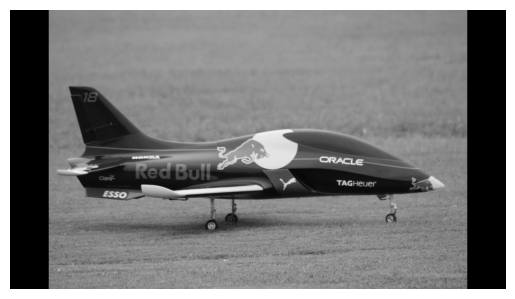

In [11]:
# plt.imshow(defaultimage)
# plt.imshow(coloredimage)
plt.imshow(grayimage, cmap="gray")
plt.axis('off')
# plt.imshow(unchangedimage)

In [13]:
grayimage

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

**Saving the image matrix in dataframe**

In [15]:
df = pd.DataFrame(grayimage)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Display Colored images using matplotlib**

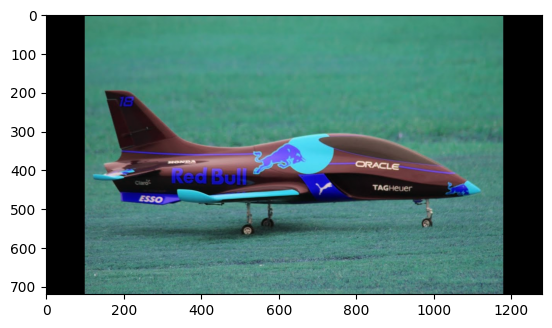

In [22]:
plt.imshow(coloredimage)
# Red and Blue color are switched due to cv2 understand BGR whereas matplotlib underdtand RGB

In [18]:
image_rgb = cv2.cvtColor(coloredimage, cv2.COLOR_BGR2RGB)

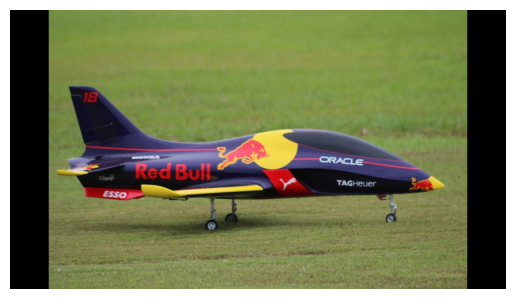

In [21]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [33]:
image_rgb.shape

(720, 1280, 3)

In [45]:
image_rgb[1:3,1:3]

array([[[0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

**Resizing images**

In [23]:
image_50x50 = cv2.resize(image_rgb, (50,50))

In [29]:
image_50x50.size

7500

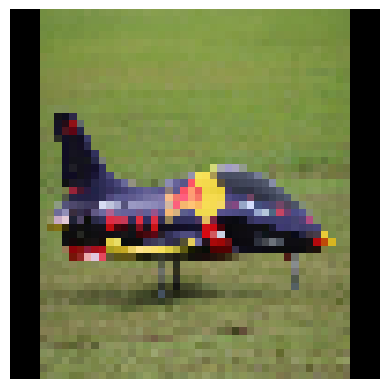

In [30]:
plt.imshow(image_50x50)
plt.axis('off')
plt.show()

**Cropping images**

In [34]:
cropped_image = image_rgb[:,:640]


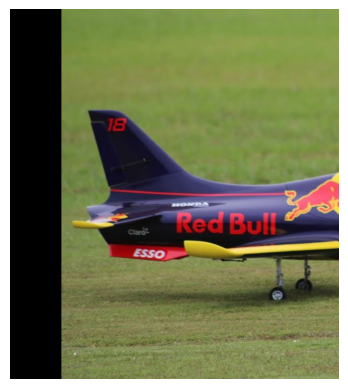

In [35]:
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

**Saving image in system**

In [48]:
image_bgr = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('croppedImageInverted.jpeg',image_bgr)

True

**Feature Selection**:
1. Recurrsive feature elimination
2. Train model with all, then check the feature importance, remove the less important and retrain the model on the basis of base model performance
3. remove columns with missing values
4. Remove columns having low variance
5. Remove highly correlated features (keep only one)

**Feature Extractions**:
1. Create new columns from the exisitng columns
2. PCA to reduce the high number of columns into smaller number (Orthogonal Transformation)
3. t-SNE is also used to reduce the dimensionality

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [50]:
digits = datasets.load_digits()

In [54]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [55]:
featrues = StandardScaler().fit_transform(digits.data)

In [70]:
pca = PCA(n_components=1, whiten=True)

In [61]:
featrues_pca = pca.fit_transform(featrues)

In [62]:
featrues.shape[1]

64

In [63]:
featrues_pca.shape[1]

10

**Kernel PCA**
<li>Kernels allow us to project the linearly inseparable data into a lower dimension where it is linearly separable.</>
<li>There are several kernels available to use:</>
<ul>
<li>Radial basis function (rbf)</>
<li>Polynomial (poly)</>
<li>Sigmoid</>
</ul>
<li>https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html</>


In [71]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

In [72]:
featrues, _ = make_circles(n_samples=100, random_state=1, noise=0.1, factor=0.1)

In [73]:
featrues.shape

(100, 2)

In [74]:
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1)
featrues_kpca = kpca.fit_transform(featrues)
featrues_pca = pca.fit_transform(featrues)

In [79]:
featrues_kpca.shape

(100, 1)

In [80]:
featrues_pca.shape

(100, 1)

**Linear Discriminant Analysis (LDA)**

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [83]:
iris = datasets.load_iris()
featrues = iris.data
target = iris.target

In [84]:
lda = LinearDiscriminantAnalysis(n_components=1)
featrues_lda = lda.fit(featrues, target).transform(featrues)

In [85]:
featrues.shape

(150, 4)

In [86]:
featrues_lda.shape

(150, 1)

In [87]:
lda.explained_variance_ratio_

array([0.9912126])

In [91]:
featrues_lda[0:3]

array([[8.06179978],
       [7.12868772],
       [7.48982797]])

In [92]:
featrues[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [103]:
featrues[:,0:4].var()

3.896056416666667

In [131]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(featrues_lda,target,test_size=.5, random_state=52)
x_train,x_test,y_train,y_test=train_test_split(featrues,target,test_size=.5, random_state=1)

In [132]:
from sklearn import tree
from sklearn.metrics import accuracy_score
classifier=tree.DecisionTreeClassifier()

In [133]:
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
print(accuracy_score(y_test,predictions))

0.92


In [134]:
classifier.fit(x_train1,y_train1)
predictions=classifier.predict(x_test1)
print(accuracy_score(y_test1,predictions))

0.96


***Plotly***

In [136]:
import plotly.express as px

In [137]:
iris_data = px.data.iris()

In [138]:
iris_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1


In [146]:
figure = px.scatter(iris_data,x='sepal_length',y='petal_length',color='species')
figure.show()

In [147]:
import seaborn as sns

In [148]:
tips = sns.load_dataset('tips')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

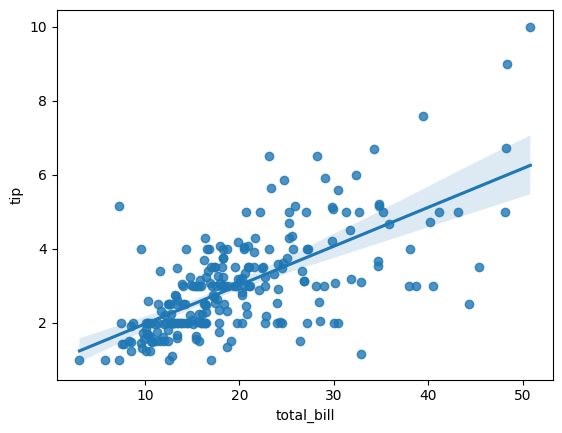

In [149]:
sns.regplot(x='total_bill',y='tip',data=tips)

In [150]:
df = px.data.tips()

In [152]:
fig = px.scatter(df, x='total_bill', y='tip', trendline='ols')
fig.show()